In [47]:
%matplotlib inline

from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.mixture import GaussianMixture as gm
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.stats import multivariate_normal as mvn
from scipy.spatial.distance import cdist
import scipy as sp

import pandas as pd

In [48]:
path = '/Users/emmadionne/Documents/'
file = 'test_angs_mags_metrics.csv'
tsv_output_file = path + file
data = pd.DataFrame.from_csv(tsv_output_file)

print(data.head())

   mov.mean  mov.std  mov.mode  mov.range  mov.eventrest  mov.maxeventval  \
0       0.0      0.0      3675        0.0              0              0.0   
1       0.0      0.0      3675        0.0              0              0.0   
2       0.0      0.0      3675        0.0              0              0.0   
3       0.0      0.0      3675        0.0              0              0.0   
4       0.0      0.0      3675        0.0              0              0.0   

   mov.surfarea  mov.totalmag  mov.firstder  mov.secder  ...  mov.timetoevent  \
0             0           0.0           0.0         0.0  ...              114   
1             0           0.0           0.0         0.0  ...              113   
2             0           0.0           0.0         0.0  ...              112   
3             0           0.0           0.0         0.0  ...              111   
4             0           0.0           0.0         0.0  ...              110   

   move.timefromevent  brain.data  brain.eventrest

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  after removing the cwd from sys.path.


In [49]:
%matplotlib inline

col_list = list(data)

#puts the paramter on a scale of 0 to 1

datacopy = data.copy()
datacopy -= datacopy.min()
datacopy /= datacopy.max()
data = datacopy.fillna(value=0)

In [50]:
data = data.astype('float16')
data['classification'] = np.zeros(len(data))
data['classification'].iloc[data.loc[(data['mov.eventrest'] == 0.0) & (data['brain.eventrest'] == 1.0)].index] = 1
data['classification'].iloc[data.loc[(data['mov.eventrest'] == 0.0) & (data['brain.eventrest'] == 0.0)].index] = 1
data['classification'].iloc[data.loc[(data['mov.eventrest'] == 1.0) & (data['brain.eventrest'] == 1.0)].index] = 0
data['classification'].iloc[data.loc[(data['mov.eventrest'] == 1.0) & (data['brain.eventrest'] == 0.0)].index] = 0

/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [51]:
sleep_indices = np.where(data["classification"] == 1)[0]
sleep_classification = []
for i in range(len(data["classification"])):
    if i in sleep_indices:
        sleep_classification.append(1)
    else:
        sleep_classification.append(0)
print(sleep_classification)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [52]:
import statsmodels.api as sm
from scipy import stats
var = ['mov.mean', 'mov.std', 'mov.mode', 'mov.range', 'mov.eventrest', 'mov.maxeventval', 'mov.surfarea', 
       'mov.totalmag', 'mov.firstder', 'mov.secder', 'mov.stdx', 'mov.stdy', 'mov.diffxystd', 'mov.diffmaxevents', 
       'mov.percent', 'mov.percenterror', 'mov.timetoevent', 'move.timefromevent', 'brain.data', 'brain.eventrest', 
       'brain.rangemaxmin', 'brain.firstder', 'brain.secder', 'diff.brainmov', 'diff.brainmovfirstder', 
       'diff.brainmovsecder']
new_vars = ['mov.mean', 'brain.data', 'mov.diffxystd', 'mov.diffmaxevents', 'mov.totalmag', 'mov.surfarea', 
            'mov.range', 'diff.brainmov', 'mov.percenterror', 'mov.percent', 'mov.stdy', 'mov.stdx', 
            'mov.maxeventval']
print(np.sum(np.isnan(data)))
zeros = np.where(sleep_classification == 0)[0]
ones = np.where(sleep_classification == 1)[0]
for i in range(len(var)):
    print(var[i])
#     logit_model=sm.Logit(data["classification"], data[new_vars[i]])
    results=stats.ttest_ind(data[var[i]][zeros], data[var[i]][ones])
    #results = stats.zscore(data[var[i]][zeros], data[var[i]][ones])
    print(results)

mov.mean                 0
mov.std                  0
mov.mode                 0
mov.range                0
mov.eventrest            0
mov.maxeventval          0
mov.surfarea             0
mov.totalmag             0
mov.firstder             0
mov.secder               0
mov.stdx                 0
mov.stdy                 0
mov.diffxystd            0
mov.diffmaxevents        0
mov.percent              0
mov.percenterror         0
mov.timetoevent          0
move.timefromevent       0
brain.data               0
brain.eventrest          0
brain.rangemaxmin        0
brain.firstder           0
brain.secder             0
diff.brainmov            0
diff.brainmovfirstder    0
diff.brainmovsecder      0
classification           0
dtype: int64
mov.mean
Ttest_indResult(statistic=nan, pvalue=nan)
mov.std
Ttest_indResult(statistic=nan, pvalue=nan)
mov.mode
Ttest_indResult(statistic=nan, pvalue=nan)
mov.range
Ttest_indResult(statistic=nan, pvalue=nan)
mov.eventrest
Ttest_indResult(statistic=nan, pvalu

/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


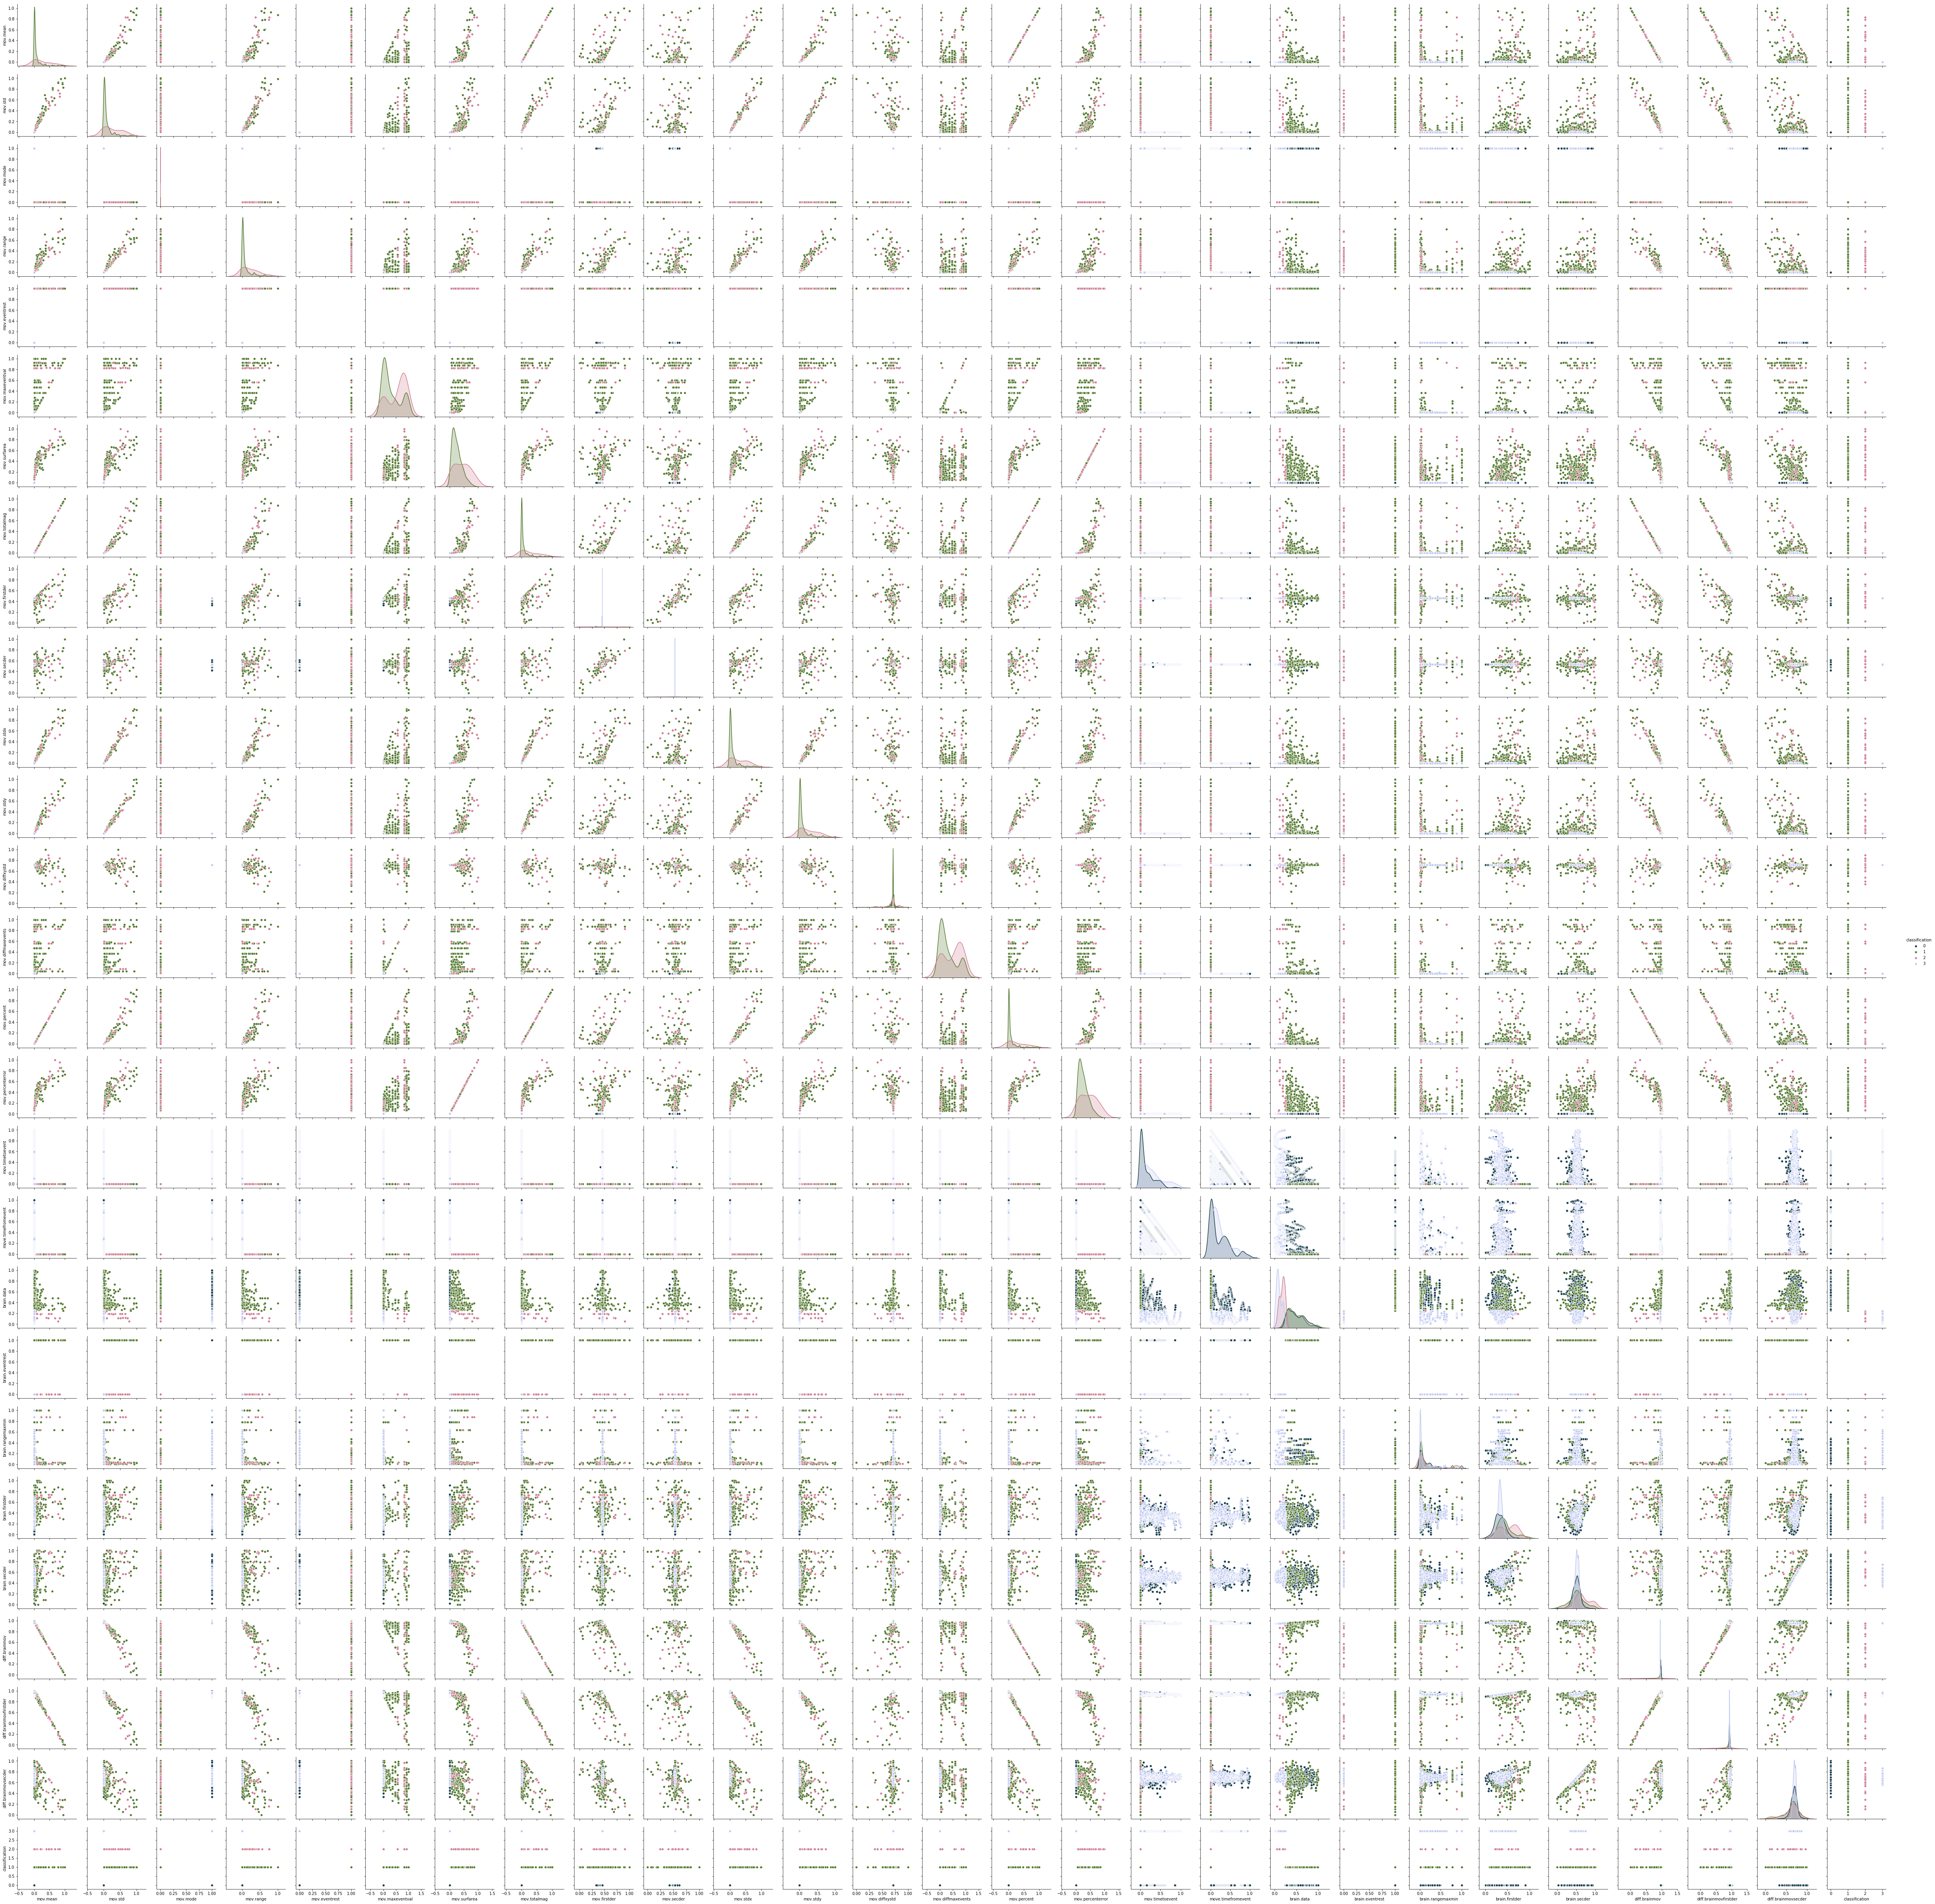

In [5]:
sns.pairplot(data, 
             diag_kind="kde", 
             markers=["o", "o", "o", "o"], 
             hue_order = [0, 1, 2, 3], hue='classification', palette = 'cubehelix')
plt.savefig('/Users/emmadionne/Documents/metrics_pairplot.png')

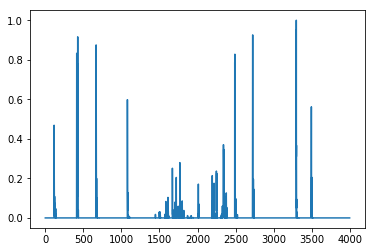

In [53]:
plt.plot(data["mov.mean"])

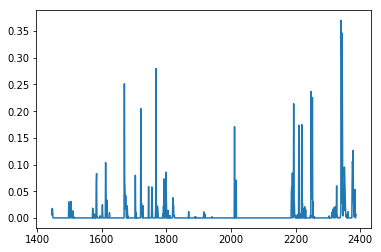

In [54]:
#1445-2387
plt.plot(data["mov.mean"][1445:2388])

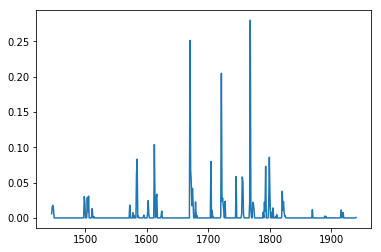

In [55]:
#1445-1941
plt.plot(data["mov.mean"][1445:1941])

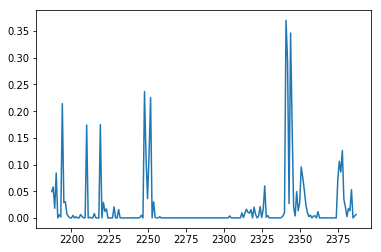

In [56]:
#2187-2387
plt.plot(data["mov.mean"][2187:2388])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

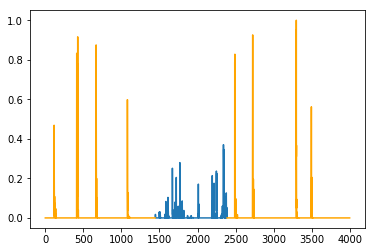

In [57]:
plt.plot(data["mov.mean"][1445:2388])
plt.plot(data["mov.mean"][0:1445], color = "orange")
plt.plot(data["mov.mean"][2388:], color = "orange")
indices = []
for i in range(len(data["mov.mean"])):
    if i >= 1445 and i < 2388:
        indices.append(1)
    else:
        indices.append(0)
        
print(indices)

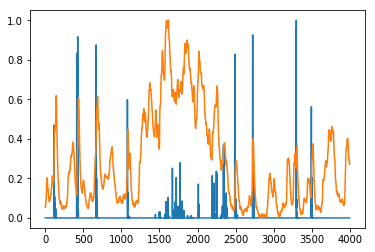

In [58]:
plt.plot(data["mov.mean"])
plt.plot(data["brain.data"])

In [64]:
data_copy = data.astype('float64')
a = np.zeros(len(data_copy))
a[1445:2388]=1
data_copy['classification'] = a

In [74]:

# data['classification'].iloc[indices == 0] = 0
# data['classification'].iloc[indices == 1] = 1
c = ["blue", "red"]
print(indices[1500])
print(data["classification"][1500])
print(data.loc[1500, "classification"])
sns.pairplot(data, 
             diag_kind="kde", 
             markers=["o", "o"], 
             hue_order = [0, 1], hue='classification', palette = c)
plt.savefig('/Users/emmadionne/Documents/metrics_small_pairplot.png')

1
1.0
1.0


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x113390400> (for post_execute):


KeyboardInterrupt: 

In [60]:
import statsmodels.api as sm
from scipy import stats
var = data.columns
new_vars = ['mov.mean', 'brain.data', 'mov.diffxystd', 'mov.diffmaxevents', 'mov.totalmag', 'mov.surfarea', 'mov.range', 'diff.brainmov', 'mov.percenterror', 'mov.percent', 'mov.stdy', 'mov.stdx', 'mov.maxeventval']
print(np.sum(np.isinf(data)))
zeros = np.where(data["classification"] == 0)[0]
ones = np.where(data["classification"] == 1)[0]
for i in range(len(var)):
    print(var[i])
#     logit_model=sm.Logit(data["classification"], data[new_vars[i]])
    results=stats.ttest_ind(data[var[i]][zeros], data[var[i]][ones])
    print(results)

mov.mean                 0
mov.std                  0
mov.mode                 0
mov.range                0
mov.eventrest            0
mov.maxeventval          0
mov.surfarea             0
mov.totalmag             0
mov.firstder             0
mov.secder               0
mov.stdx                 0
mov.stdy                 0
mov.diffxystd            0
mov.diffmaxevents        0
mov.percent              0
mov.percenterror         0
mov.timetoevent          0
move.timefromevent       0
brain.data               0
brain.eventrest          0
brain.rangemaxmin        0
brain.firstder           0
brain.secder             0
diff.brainmov            0
diff.brainmovfirstder    0
diff.brainmovsecder      0
classification           0
dtype: int64
mov.mean
Ttest_indResult(statistic=0.3404258138502651, pvalue=0.7335537671694952)
mov.std
Ttest_indResult(statistic=-1.1630306163166044, pvalue=0.24488649249592825)
mov.mode
Ttest_indResult(statistic=14.45399356444349, pvalue=3.3927632538723603e-46)
mov.rang

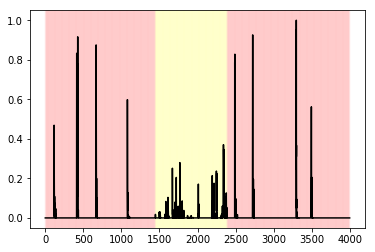

In [61]:
def plotClassification(data, indices, color):
    if (len(np.unique(indices)) > 2):
        for i in range(len(indices)):
            if (indices[i] == 0):
                plt.axvline(x = i, color='blue', alpha = 0.01)
            elif (indices[i] == 1):
                plt.axvline(x = i, color='orange', alpha = 0.01)
            #only uses the first two if indices is binary (twitches)
            elif (indices[i] == 2):
                plt.axvline(x = i, color='green', alpha = 3)
            else:
                plt.axvline(x = i, color='purple', alpha = 3)
    else:
        for i in range(len(indices)):
            if(indices[i] == 0):
                plt.axvline(x = i, color='red', alpha = 0.01)
            elif(indices[i] == 1):
                plt.axvline(x = i, color='yellow', alpha = 0.01)
    plt.plot(data, color)
    
plotClassification(data["mov.mean"], indices,"black")
#plotClassification(data["brain.data"], indices, "black")

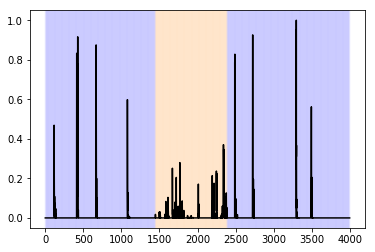

In [62]:
def plotClassification(data, indices, color):
    for i in range(len(indices)):
        if (indices[i] == 0):
            plt.axvline(x = i, color='blue', alpha = 0.01)
        elif (indices[i] == 1):
            plt.axvline(x = i, color='orange', alpha = 0.01)
        elif (indices[i] == 2):
            plt.axvline(x = i, color='green')
    plt.plot(data, color)
    
plotClassification(data["mov.mean"], indices, "black")

In [63]:
import statsmodels.api as sm
from scipy import stats
var = data.columns
new_vars = ['mov.mean, mov.range', 'mov.maxeventval', 'mov.surfacearea','mov.totalmag', 'mov.stdx', 
           'mov.stdy', 'mov.diffxystd', 'mov.diffmaxevents', 'mov.percent', 'mov.percenterror', 
           'brain.data', 'diff.brainmov']
#new_vars = ['mov.mean', 'mov.std', 'mov.diffxystd', 'mov.diffmaxevents', 'mov.totalmag', 'mov.surfarea', 'mov.range', 'diff.brainmov', 'mov.percenterror', 'mov.percent', 'mov.stdy', 'mov.stdx', 'mov.maxeventval']
print(np.sum(np.isinf(data)))
zeros = np.where(data["classification"] == 0)[0]
ones = np.where(data["classification"] == 1)[0]
for i in range(len(new_vars)):
    print(new_vars[i])
#     logit_model=sm.Logit(data["classification"], data[new_vars[i]])
    results=stats.ttest_ind(data[new_vars[i]][zeros], data[new_vars[i]][ones])
    print(results)

mov.mean                 0
mov.std                  0
mov.mode                 0
mov.range                0
mov.eventrest            0
mov.maxeventval          0
mov.surfarea             0
mov.totalmag             0
mov.firstder             0
mov.secder               0
mov.stdx                 0
mov.stdy                 0
mov.diffxystd            0
mov.diffmaxevents        0
mov.percent              0
mov.percenterror         0
mov.timetoevent          0
move.timefromevent       0
brain.data               0
brain.eventrest          0
brain.rangemaxmin        0
brain.firstder           0
brain.secder             0
diff.brainmov            0
diff.brainmovfirstder    0
diff.brainmovsecder      0
classification           0
dtype: int64
mov.mean, mov.range


KeyError: 'mov.mean, mov.range'

In [ ]:
import statsmodels.api as sm
from scipy import stats
#var = ['mov.mean', 'mov.std', 'mov.mode', 'mov.range', 'mov.eventrest', 'mov.maxeventval', 'mov.surfarea', 
       #'mov.totalmag', 'mov.firstder', 'mov.secder', 'mov.stdx', 'mov.stdy', 'mov.diffxystd', 'mov.diffmaxevents', 
       #'mov.percent', 'mov.percenterror', 'mov.timetoevent', 'mov.timefromevent', 'brain.data', 'brain.eventrest', 
       #'brain.rangemaxmin', 'brain.firstder', 'brain.secder', 'diff.brainmov', 'diff.brainmovfirstder', 
       #'diff.brainmovsecder']
new_vars = ['mov.mean', 'brain.data', 'mov.diffxystd', 'mov.diffmaxevents', 'mov.totalmag', 'mov.surfarea', 
            'mov.range', 'diff.brainmov', 'mov.percenterror', 'mov.percent', 'mov.stdy', 'mov.stdx', 
            'mov.maxeventval']
#print(np.sum(np.isinf(data)))
zeros = np.where(data["classification"] == 0)[0]
ones = np.where(data["classification"] == 1)[0]
for i in range(len(new_vars)):
    print(new_vars[i])
#     logit_model=sm.Logit(data["classification"], data[new_vars[i]])
    results=stats.ttest_ind(data[new_vars[i]][zeros], data[new_vars[i]][ones])
    #results = stats.zscore(data[var[i]][zeros], data[var[i]][ones])
    print(results)

In [ ]:
import statsmodels.api as sm
from scipy import stats
var = data.columns
new_vars = ['mov.mean', 'brain.data', 'mov.diffxystd', 'mov.diffmaxevents', 'mov.totalmag', 'mov.surfarea', 'mov.range', 'diff.brainmov', 'mov.percenterror', 'mov.percent', 'mov.stdy', 'mov.stdx', 'mov.maxeventval']
# print(np.sum(np.isinf(data)))
zeros = np.where(data["classification"] == 0)[0]
ones = np.where(data["classification"] == 1)[0]
print(len(zeros))
print(len(ones))
for i in range(len(var)):
    print(var[i])
#     logit_model=sm.Logit(data["classification"], data[new_vars[i]])
#    results=stats.ttest_ind(data[var[i]][zeros], data[var[i]][ones])
    first_z_score = stats.zscore(data[var[i]][zeros].tolist())
    second_z_score = stats.zscore(data[var[i]][ones].tolist())
    p = sp.stats.norm.sf(second_z_score) *2
    print(p)
        
        

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

y = data.loc[:,'classification']

X_train, X_test, y_train, y_test = train_test_split(var, y, 
            test_size=0.3, random_state=42)

#Logistic Regression
logreg = LogisticRegression(C  = 1, solver = 'liblinear')
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of Logistic Regression classifier on test set:\t\
                {:.2f}'.format(logreg.score(X_test, y_test)))

print(y_pred)
print(type(y_test))
print(y_test[0])
# test = np.zeros(len(y_test))
# for i in range(len(y_test)):
#     test[i] = y_test[i]
    
# print(test)
# plt.scatter(test)

ValueError: Found input variables with inconsistent numbers of samples: [27, 4000]

In [ ]:
def plot_classification(data, indices, color):
    colors_list = ["violet", "magenta", "teal", "silver", "salmon", "pink"]
    num_color = 0;
    if (len(np.unique(indices)) > 2):
        for i in range(len(indices)):
            if (indices[i] == 0):
                plt.axvline(x = i, color = 'blue', alpha = 0.01)
            elif (indices[i] == 1):
                plt.axvline(x = i, color = 'orange', alpha = 0.01)
            elif (indices[i] == 2):
                plt.axvline(x = i, color = 'green', alpha = 0.01 )
            elif (indices[i] == 3 ):
                plt.axvline(x = i, color = 'purple', alpha = 3)
            else:
                if (num_color == len(colors_list)):
                    num_color = 0
                else:
                    plt.axvline(x = i, color = colors_list[num_color], alpha = 0.01)
                    num_color += num_color
                
    else:
        for i in range(len(indices)):
            if (indices [i] == 0):
                plt.axvline(x = i, color = 'purple', alpha = 0.01)
            elif (indices [i] == 1):
                plt.axvline(x = i, color = 'yellow', alpha = 0.01)
    
    plt.plot(data, color)

In [ ]:
var.loc[X_test.index, 'predicted_classifier'] = logreg.predict(X_test)
var.loc[X_train.index, 'predicted_classifier'] = logreg.predict(X_train)
var.sort_index()
plot_classification(data["mov.mean"], var["predicted_classifier"], "black" )

## Support Vector Machine Classifer with Gaussian kernel

In [ ]:
from sklearn.svm import SVC

svm_clf = SVC(kernel="rbf", gamma=0.01, C=50, random_state=42, probability= True)
svm_clf.fit(X_train, y_train)


In [ ]:

y_pred = svm_clf.predict(X_test)

print('Accuracy of SVM classifier on test set: {:.2f}'.format(svm_clf.score(X_test, y_test)))

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
col_list = ['not pred.', 'pred.']
row_list = ['not twitch', 'twitch']
row_format ="{:>15}" * (len(col_list) + 1)
print(row_format.format("", *col_list))
for rlist, row in zip(row_list, confusion_matrix):
    print(row_format.format(rlist, *row))

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

roc_auc = roc_auc_score(y_test, svm_clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, svm_clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='SVC (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
# plt.savefig('SVM_ROC.svg')
plt.show()

var.loc[X_test.index, 'SVC_prob'] = svm_clf.predict_proba(X_test)[:,1]
var.loc[X_train.index, 'SVC_prob'] = svm_clf.predict_proba(X_train)[:,1]


## Gaussian Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

gnb = GaussianNB(var_smoothing= 0.25)
gnb.fit(X_train, y_train)

In [ ]:
y_pred = gnb.predict(X_test)

print('Accuracy of Gaussian NB classifier on test set: {:.2f}'.format(gnb.score(X_test, y_test)))

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
col_list = ['not pred.', 'pred.']
row_list = ['not act.', 'act.']
row_format ="{:>15}" * (len(col_list) + 1)
print(row_format.format("", *col_list))
for rlist, row in zip(row_list, confusion_matrix):
    print(row_format.format(rlist, *row))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

roc_auc = roc_auc_score(y_test, gnb.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, gnb.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Gaussian NB (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

var.loc[X_test.index, 'gnb_prob'] = gnb.predict_proba(X_test)[:,1]
var.loc[X_train.index, 'gnb_prob'] = gnb.predict_proba(X_train)[:,1]

## Logistic Regression

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression(C=1, solver='lbfgs')
logreg.fit(X_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [66]:
y_pred = logreg.predict(X_test)

print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.89


In [67]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
col_list = ['not pred.', 'pred.']
row_list = ['not act.', 'act.']
row_format ="{:>15}" * (len(col_list) + 1)
print(row_format.format("", *col_list))
for rlist, row in zip(row_list, confusion_matrix):
    print(row_format.format(rlist, *row))

                     not pred.          pred.
       not act.            877             35
           act.             93            195


In [68]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.96      0.93       912
         1.0       0.85      0.68      0.75       288

   micro avg       0.89      0.89      0.89      1200
   macro avg       0.88      0.82      0.84      1200
weighted avg       0.89      0.89      0.89      1200



In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

var.loc[X_test.index, 'logreg_prob'] = logreg.predict_proba(X_test)[:,1]
var.loc[X_train.index, 'logreg_prob'] = logreg.predict_proba(X_train)[:,1]

# print(data.loc[X_test.index, 'signal'])

# print(logreg.predict_proba(X_test))